In [1]:
!pip install powerlaw

In [61]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable

191


<ipython-input-81-2407ad1e38e7>:36: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm, orientation='horizontal', shrink=0.7)


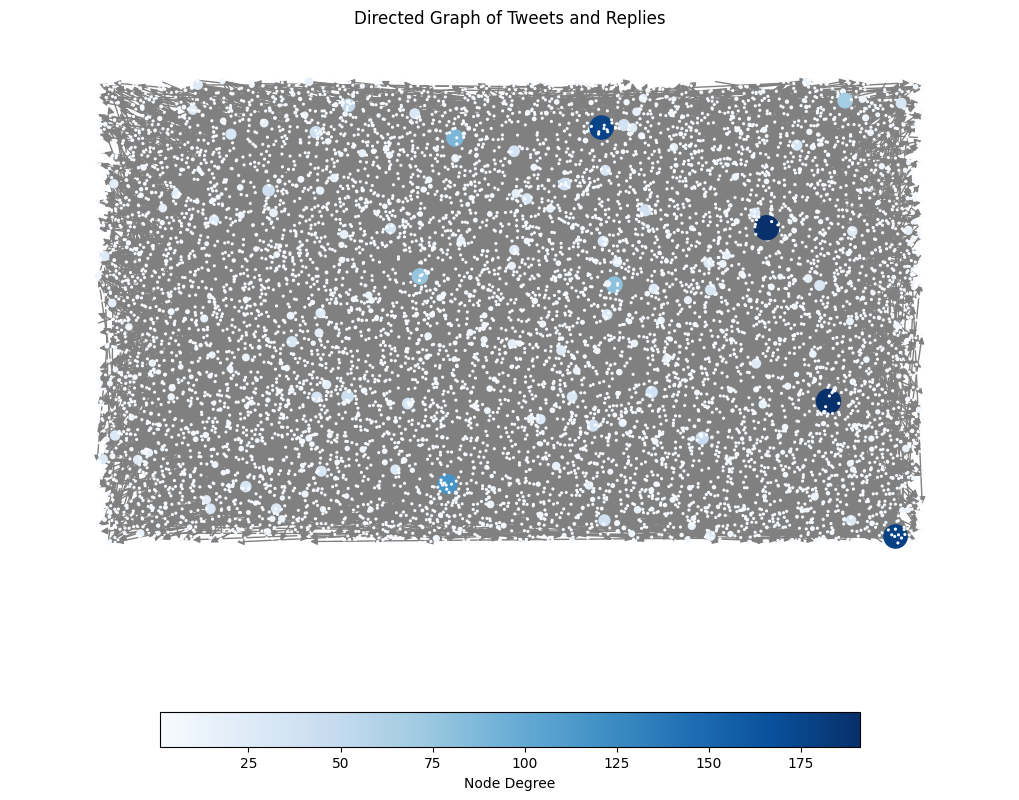

In [81]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable

# Read the CSV file into a Pandas DataFrame
tweets = pd.read_csv("/content/NewsFakeCOVID-19_tweets_replies.csv")

# Create a directed graph using NetworkX
G = nx.DiGraph()

# Add nodes to the graph using "tweet_id" and "reply_id" columns
G.add_nodes_from(tweets['tweet_id'])
G.add_nodes_from(tweets['reply_id'])

# Add directed edges from "tweet_id" nodes to "reply_id" nodes
edges = [(tweet_id, reply_id) for tweet_id, reply_id in tweets[['tweet_id', 'reply_id']].values]
G.add_edges_from(edges)
#nx.write_edgelist(G, "directed_graph_news_tp.csv", delimiter=',', data=False)
# Compute node degrees
node_degrees = dict(G.degree())

# Normalize node degrees for node size
max_degree = max(node_degrees.values())
print(max_degree)
node_sizes = [300 * (node_degrees[node] / max_degree) for node in G.nodes()]

# Visualize the directed graph
plt.figure(figsize=(10, 8))
pos = nx.random_layout(G)  # Positions nodes using the spring layout algorithm
nx.draw(G, pos, with_labels=False, node_size=node_sizes, node_color=list(node_degrees.values()), cmap=plt.cm.Blues, font_size=10, edge_color='gray', arrowsize=10)

# Create a ScalarMappable object for colorbar
sm = ScalarMappable(cmap=plt.cm.Blues)
sm.set_array(list(node_degrees.values()))
cbar = plt.colorbar(sm, orientation='horizontal', shrink=0.7)
cbar.set_label('Node Degree')

plt.title("Directed Graph of Tweets and Replies")
plt.show()

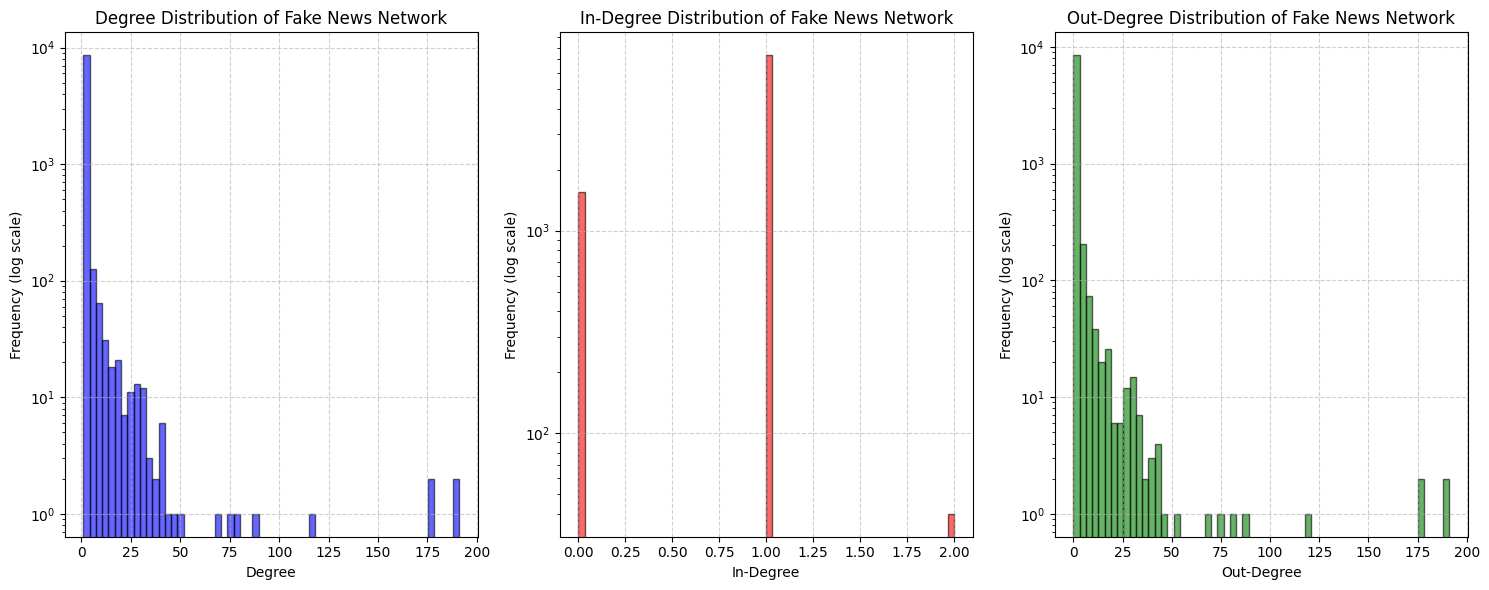

Calculating best minimal value for power law fit
Estimated degree exponent (gamma): 2.3094780516923574


In [82]:
plt.figure(figsize=(15, 6))

degrees = dict(G.degree())
degree_values = list(degrees.values())

plt.subplot(1, 3, 1)
plt.hist(degree_values, bins=60, log=True, edgecolor='black', color='blue', alpha=0.6)
plt.title('Degree Distribution of Fake News Network')
plt.xlabel('Degree')
plt.ylabel('Frequency (log scale)')
plt.grid(True, linestyle='--', alpha=0.6)

in_degrees = dict(G.in_degree())
in_degree_values = list(in_degrees.values())

plt.subplot(1, 3, 2)
plt.hist(in_degree_values, bins=60, log=True, edgecolor='black', color='red', alpha=0.6)
plt.title('In-Degree Distribution of Fake News Network')
plt.xlabel('In-Degree')
plt.ylabel('Frequency (log scale)')
plt.grid(True, linestyle='--', alpha=0.6)

# Compute out-degree distribution
out_degrees = dict(G.out_degree())
out_degree_values = list(out_degrees.values())

plt.subplot(1, 3, 3)
plt.hist(out_degree_values, bins=60, log=True, edgecolor='black', color='green', alpha=0.6)
plt.title('Out-Degree Distribution of Fake News Network')
plt.xlabel('Out-Degree')
plt.ylabel('Frequency (log scale)')
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

fit = powerlaw.Fit(list(degrees.values()))
gamma = fit.power_law.alpha
print("Estimated degree exponent (gamma):", gamma)

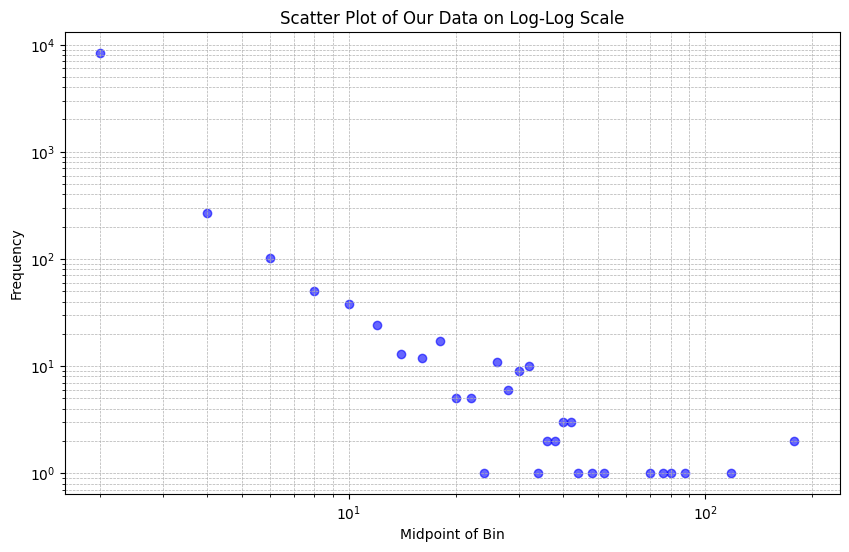

In [64]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming our_data is your data from the graph
# Linear Binning with smaller step size for more points
# Compute node degrees
node_degrees = dict(G.degree())

# Extract the degree values as our_data
our_data = np.array(list(node_degrees.values()))  # Convert to NumPy array

bin_edges = np.arange(start=np.floor(our_data.min()), stop=np.ceil(our_data.max()) + 2, step=2)  # Decreased step size to 2 for smaller bins

bin_indices = np.digitize(our_data, bins=bin_edges)
bin_counts = np.bincount(bin_indices)[1:]  # Exclude count for index 0 which is for out of range values
mid_points = bin_edges[:-1] + 1  # Midpoint of each bin assuming bin size of 2

# Ensure the lengths of mid_points and bin_counts are the same
if len(mid_points) != len(bin_counts):
    # Adjust the length of bin_counts to match mid_points
    bin_counts = bin_counts[:-1]  # Remove the last element of bin_counts

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(mid_points, bin_counts, color='blue', alpha=0.6)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Midpoint of Bin')
plt.ylabel('Frequency')
plt.title('Scatter Plot of Our Data on Log-Log Scale')
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.show()

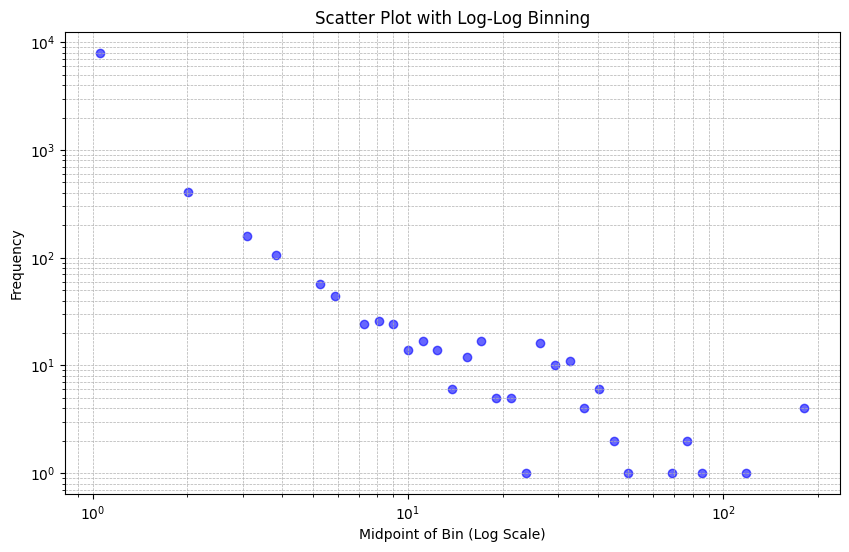

In [65]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming simulated_data is a numpy array previously defined

# Log-binning: This technique is used to create bins whose sizes increase exponentially.
# It is particularly useful for data covering several orders of magnitude,
# allowing for a more uniform distribution of data points across bins.

# Define log bin edges using base 2 logarithm.
# The maximum log value of the data determines the range and number of bins.
# 'start=0' ensures the first bin starts at 1 (2^0 = 1),
# 'stop=max_log' determines the upper edge of the last bin based on the maximum value in the data,
# 'num=int(max_log)+2' ensures an appropriate number of bins is created to cover the range of the data.
max_log = np.log10(our_data.max())
bin_edges = np.logspace(start=0, stop=max_log, num=50, base=10)

# Calculate histogram: This function counts the number of data points within each bin defined by 'bin_edges'.
# 'hist' contains the counts for each bin, and 'edges' are the edges of the bins used.
hist, edges = np.histogram(our_data, bins=bin_edges)

# Calculate midpoints for scatter plot: For each bin, the midpoint is calculated as the geometric mean of the bin's edges.
# This provides a representative value for the bin, especially useful when plotting on a log scale.
mid_points = np.sqrt(edges[:-1] * edges[1:])

# Plot: Initializes a figure for the scatter plot with a specified size.
plt.figure(figsize=(10, 6))

# Creates a scatter plot with the bin midpoints on the x-axis and their corresponding frequencies on the y-axis.
# Both axes are set to logarithmic scale ('log') to accommodate the exponential nature of the data and bins.
# This allows for better visualization and understanding of datasets that span several orders of magnitude.
plt.scatter(mid_points, hist, color='blue', alpha=0.6)

# Additional plot formatting: setting log scale for axes, labeling axes, adding a title, and enabling grid lines for readability.
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Midpoint of Bin (Log Scale)')
plt.ylabel('Frequency')
plt.title('Scatter Plot with Log-Log Binning')
plt.grid(True, which="both", ls="--", linewidth=0.5)

# Displays the plot.
plt.show()


Calculating best minimal value for power law fit


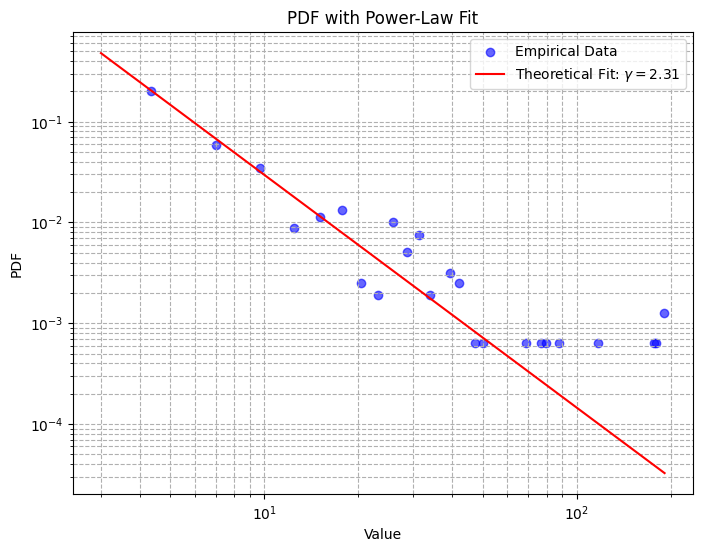

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import powerlaw

# Assuming simulated_data is your dataset
fit = powerlaw.Fit(our_data)

# Extract the estimated power-law exponent
gamma = fit.power_law.alpha
xmin = fit.xmin

# For plotting purposes, manually determine an appropriate C value
# One approach is to match the PDF at xmin for both empirical and theoretical curves
hist, edges = np.histogram(our_data[our_data >= xmin], bins=70, density=True)
bin_centers = (edges[:-1] + edges[1:]) / 2
# Assuming the first bin center after xmin roughly represents the starting point
C_empirical = hist[0] / (bin_centers[0] ** -gamma)

# Plotting
plt.figure(figsize=(8, 6))

# Empirical data (log-binned)
plt.scatter(bin_centers, hist, color='blue', alpha=0.6, label='Empirical Data')

# Theoretical power-law fit line
x_fit = np.linspace(xmin, max(our_data), 20)
y_fit = C_empirical * x_fit ** (-gamma)
plt.plot(x_fit, y_fit, 'r-', label=f'Theoretical Fit: $\gamma = {gamma:.2f}$')

# Log-log scale
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Value')
plt.ylabel('PDF')
plt.title('PDF with Power-Law Fit')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()


Calculating best minimal value for power law fit


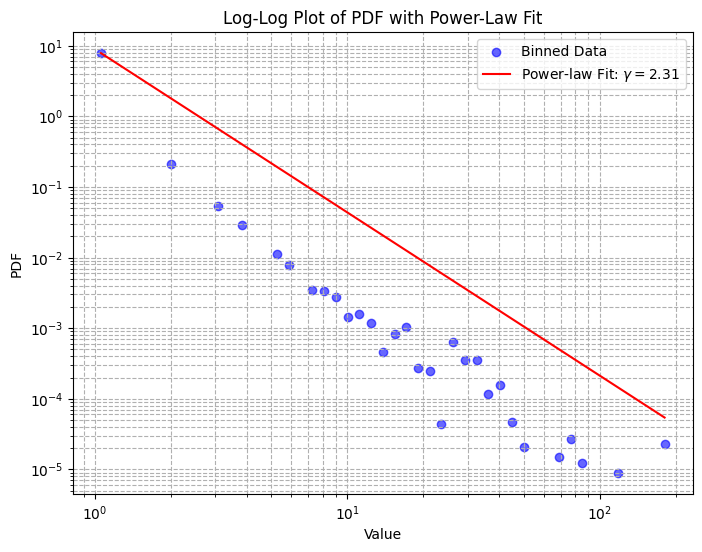

In [67]:
import numpy as np
import matplotlib.pyplot as plt
import powerlaw

# Fit the data to a power-law distribution
fit = powerlaw.Fit(our_data)

# Log-binning of simulated_data for visualization
min_data, max_data = np.min(our_data), np.max(our_data)
bin_edges = np.logspace(np.log10(min_data), np.log10(max_data), num=50)
hist, edges = np.histogram(our_data, bins=bin_edges, density=False)
bin_centers = np.sqrt(edges[:-1] * edges[1:])
non_zero_indices = hist > 0

# Filter out zero histogram values for plotting
filtered_hist = hist[non_zero_indices]
filtered_bin_centers = bin_centers[non_zero_indices]

# Normalize histogram to obtain PDF
pdf_values = filtered_hist / sum(filtered_hist) / np.diff(bin_edges)[non_zero_indices]

# Plot the binned data as a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(filtered_bin_centers, pdf_values, color='blue', alpha=0.6, label='Binned Data')

# Extract gamma (α) from the power-law fit
gamma = fit.power_law.alpha

# To approximate C, we use the first non-zero bin center and its PDF value
C_approx = pdf_values[0] * (filtered_bin_centers[0] ** gamma)

# Prepare and plot the power-law fit line across the observed data range
x_fit = np.linspace(filtered_bin_centers[0], filtered_bin_centers[-1], 1000)
y_fit = C_approx * x_fit ** (-gamma)
plt.plot(x_fit, y_fit, 'r-', label=f'Power-law Fit: $\\gamma = {gamma:.2f}$')

# Set to log-log scale
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Value')
plt.ylabel('PDF')
plt.title('Log-Log Plot of PDF with Power-Law Fit')
plt.legend()
plt.grid(True, which="both", ls="--")

# Show the plot
plt.show()


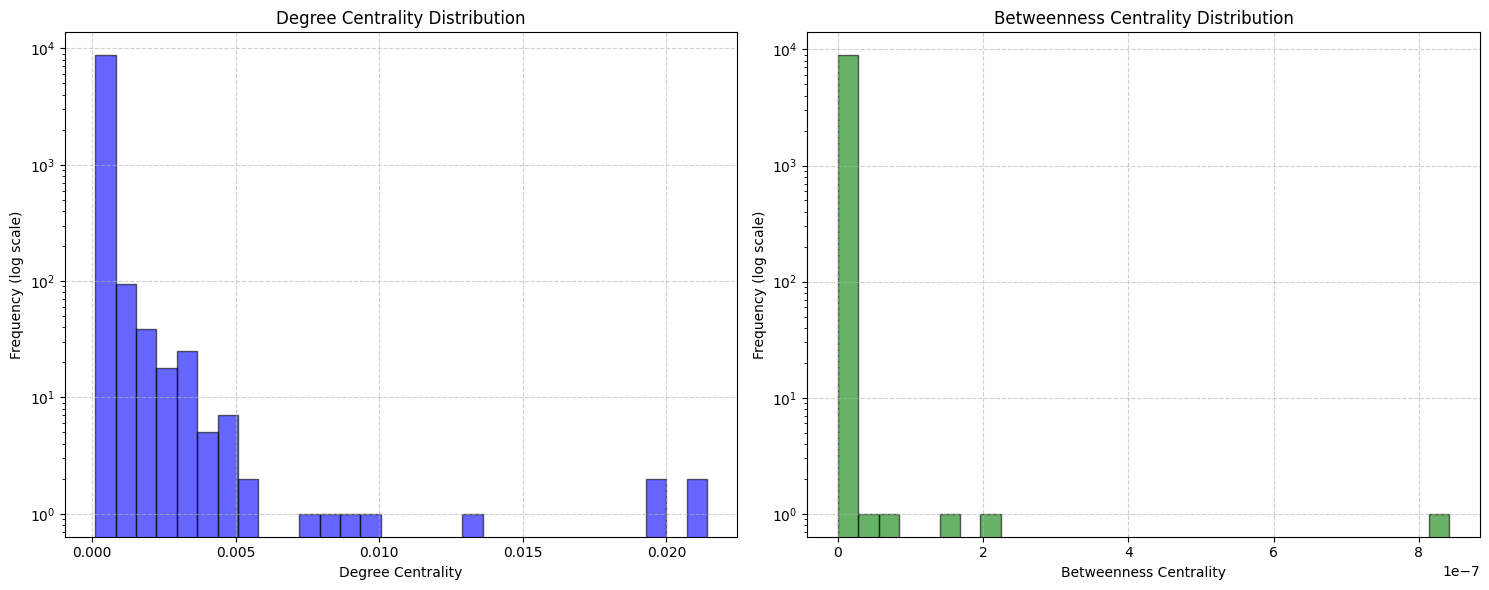

Pearson correlation coefficient between Degree and Betweenness Centrality: 0.14506229484022892


In [68]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)

plt.figure(figsize=(15, 6))

plt.subplot(1,2,1)
plt.hist(list(degree_centrality.values()), bins=30, log=True, edgecolor='black', color='blue', alpha=0.6)
plt.title('Degree Centrality Distribution')
plt.xlabel('Degree Centrality')
plt.ylabel('Frequency (log scale)')
plt.grid(True, linestyle='--', alpha=0.6)

plt.subplot(1,2,2)
plt.hist(list(betweenness_centrality.values()), bins=30, log=True, edgecolor='black', color='green', alpha=0.6)
plt.title('Betweenness Centrality Distribution')
plt.xlabel('Betweenness Centrality')
plt.ylabel('Frequency (log scale)')
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

# Calculate Pearson correlation coefficient
correlation, _ = pearsonr(list(degree_centrality.values()), list(betweenness_centrality.values()))
print("Pearson correlation coefficient between Degree and Betweenness Centrality:", correlation)


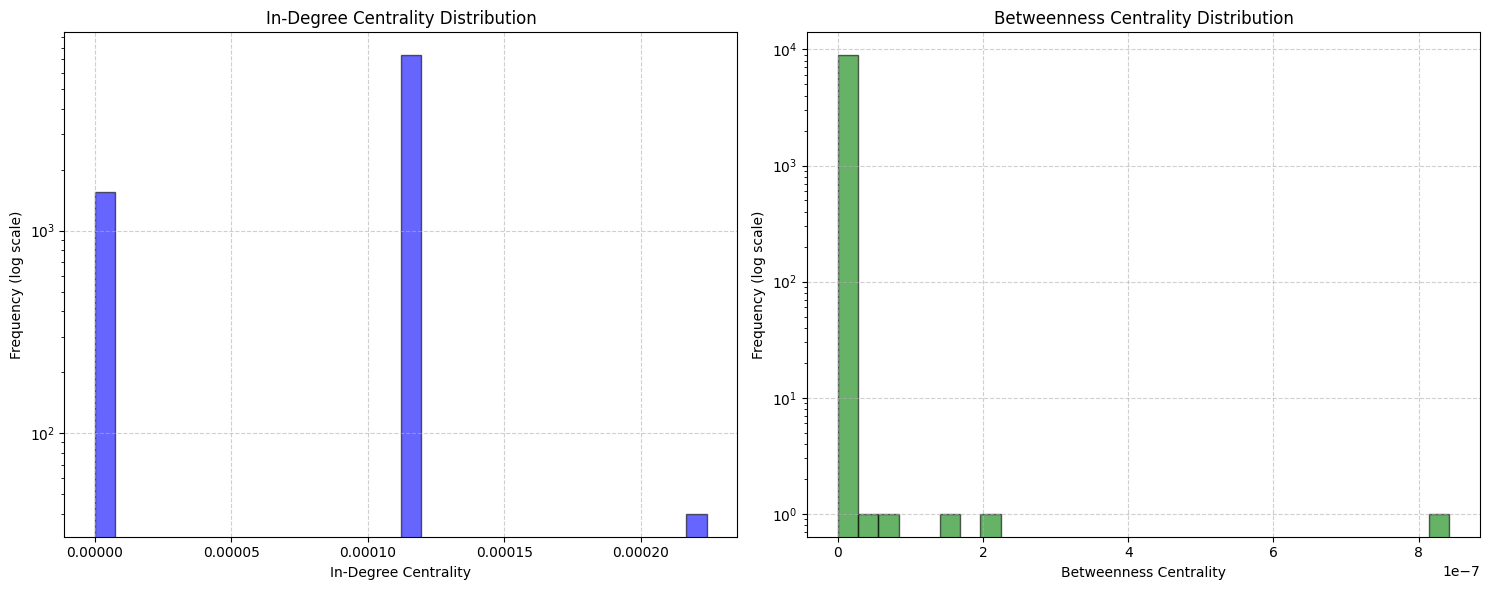

Pearson correlation coefficient between In-Degree and Betweenness Centrality: 0.007377117972339037


In [69]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

in_degree_centrality = nx.in_degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)

plt.figure(figsize=(15, 6))

plt.subplot(1,2,1)
plt.hist(list(in_degree_centrality.values()), bins=30, log=True, edgecolor='black', color='blue', alpha=0.6)
plt.title('In-Degree Centrality Distribution')
plt.xlabel('In-Degree Centrality')
plt.ylabel('Frequency (log scale)')
plt.grid(True, linestyle='--', alpha=0.6)

plt.subplot(1,2,2)
plt.hist(list(betweenness_centrality.values()), bins=30, log=True, edgecolor='black', color='green', alpha=0.6)
plt.title('Betweenness Centrality Distribution')
plt.xlabel('Betweenness Centrality')
plt.ylabel('Frequency (log scale)')
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

# Calculate Pearson correlation coefficient
correlation, _ = pearsonr(list(in_degree_centrality.values()), list(betweenness_centrality.values()))
print("Pearson correlation coefficient between In-Degree and Betweenness Centrality:", correlation)

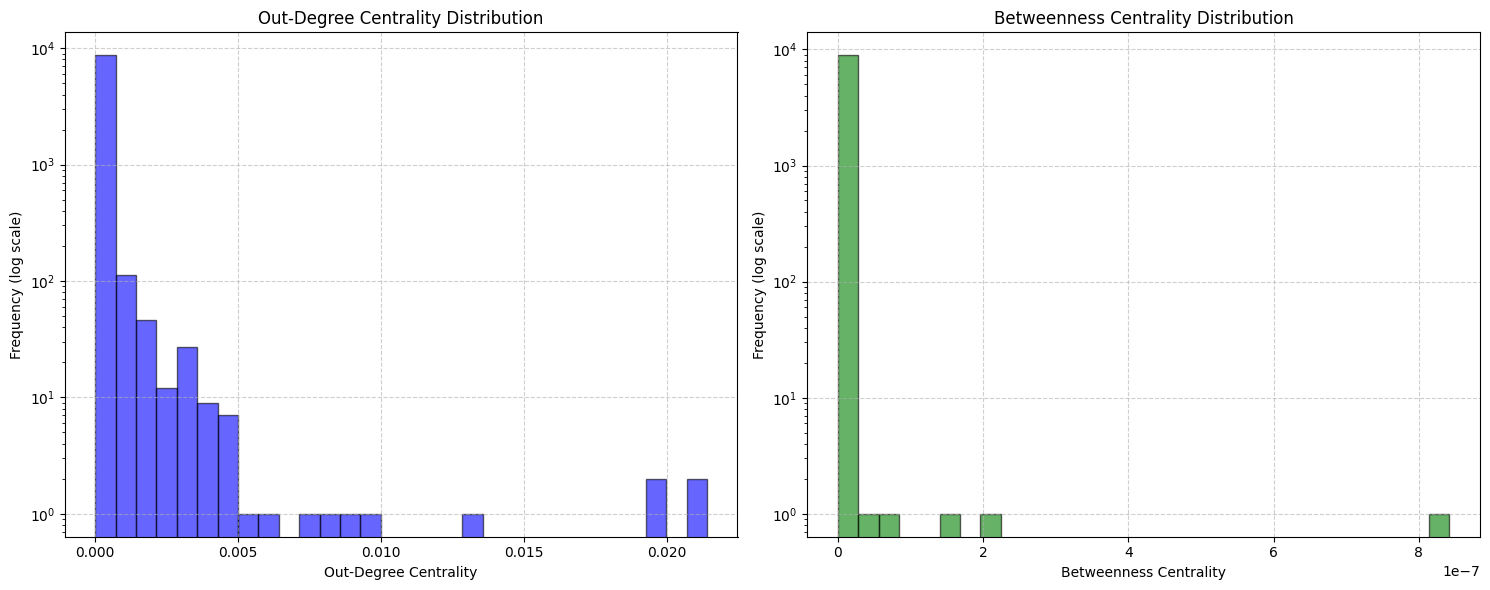

Pearson correlation coefficient between Out-Degree and Betweenness Centrality: 0.14143223429680157


In [70]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

out_degree_centrality = nx.out_degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)

plt.figure(figsize=(15, 6))

plt.subplot(1,2,1)
plt.hist(list(out_degree_centrality.values()), bins=30, log=True, edgecolor='black', color='blue', alpha=0.6)
plt.title('Out-Degree Centrality Distribution')
plt.xlabel('Out-Degree Centrality')
plt.ylabel('Frequency (log scale)')
plt.grid(True, linestyle='--', alpha=0.6)

plt.subplot(1,2,2)
plt.hist(list(betweenness_centrality.values()), bins=30, log=True, edgecolor='black', color='green', alpha=0.6)
plt.title('Betweenness Centrality Distribution')
plt.xlabel('Betweenness Centrality')
plt.ylabel('Frequency (log scale)')
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

# Calculate Pearson correlation coefficient
correlation, _ = pearsonr(list(out_degree_centrality.values()), list(betweenness_centrality.values()))
print("Pearson correlation coefficient between Out-Degree and Betweenness Centrality:", correlation)

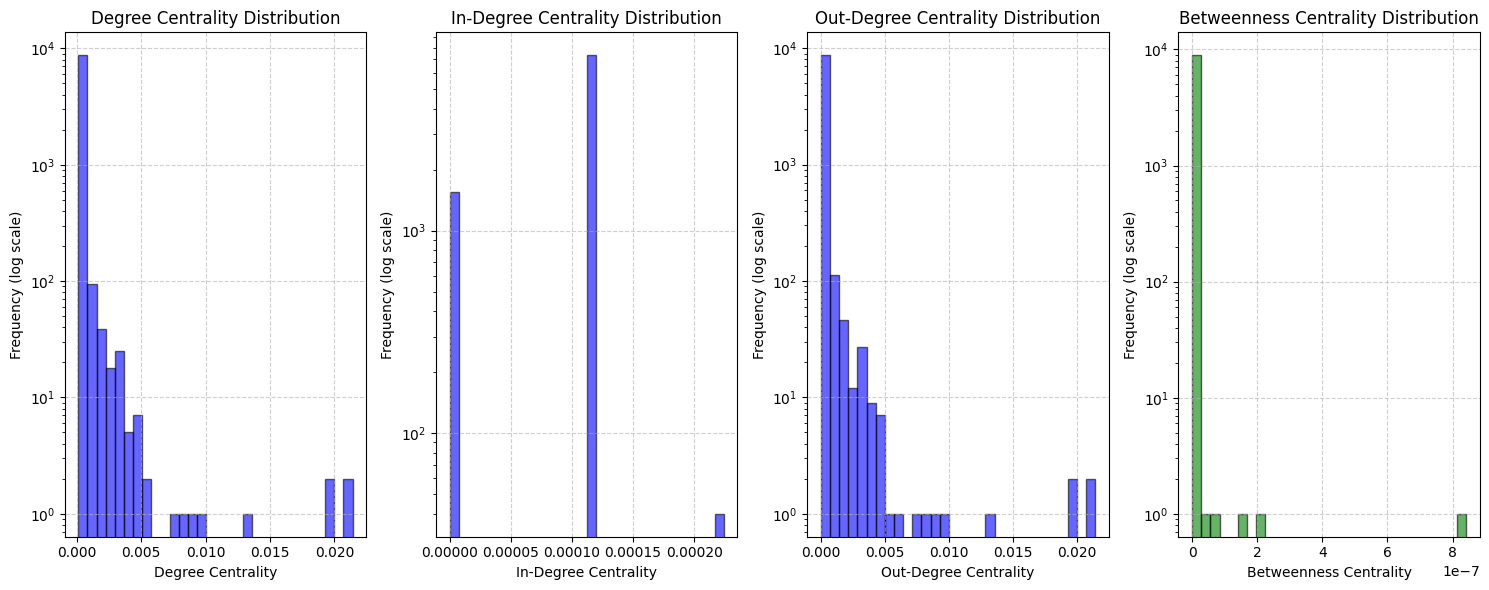

Pearson correlation coefficient between Degree and Betweenness Centrality: 0.14506229484022892
Pearson correlation coefficient between In-Degree and Betweenness Centrality: 0.007377117972339037
Pearson correlation coefficient between Out-Degree and Betweenness Centrality: 0.14143223429680157


In [71]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

degree_centrality = nx.degree_centrality(G)
in_degree_centrality = nx.in_degree_centrality(G)
out_degree_centrality = nx.out_degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)

plt.figure(figsize=(15, 6))

plt.subplot(1,4,1)
plt.hist(list(degree_centrality.values()), bins=30, log=True, edgecolor='black', color='blue', alpha=0.6)
plt.title('Degree Centrality Distribution')
plt.xlabel('Degree Centrality')
plt.ylabel('Frequency (log scale)')
plt.grid(True, linestyle='--', alpha=0.6)

plt.subplot(1,4,2)
plt.hist(list(in_degree_centrality.values()), bins=30, log=True, edgecolor='black', color='blue', alpha=0.6)
plt.title('In-Degree Centrality Distribution')
plt.xlabel('In-Degree Centrality')
plt.ylabel('Frequency (log scale)')
plt.grid(True, linestyle='--', alpha=0.6)

plt.subplot(1,4,3)
plt.hist(list(out_degree_centrality.values()), bins=30, log=True, edgecolor='black', color='blue', alpha=0.6)
plt.title('Out-Degree Centrality Distribution')
plt.xlabel('Out-Degree Centrality')
plt.ylabel('Frequency (log scale)')
plt.grid(True, linestyle='--', alpha=0.6)

plt.subplot(1,4,4)
plt.hist(list(betweenness_centrality.values()), bins=30, log=True, edgecolor='black', color='green', alpha=0.6)
plt.title('Betweenness Centrality Distribution')
plt.xlabel('Betweenness Centrality')
plt.ylabel('Frequency (log scale)')
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

# Calculate Pearson correlation coefficient
correlation_deg, _ = pearsonr(list(degree_centrality.values()), list(betweenness_centrality.values()))
correlation_in, _ = pearsonr(list(in_degree_centrality.values()), list(betweenness_centrality.values()))
correlation_out, _ = pearsonr(list(out_degree_centrality.values()), list(betweenness_centrality.values()))
print("Pearson correlation coefficient between Degree and Betweenness Centrality:", correlation_deg)
print("Pearson correlation coefficient between In-Degree and Betweenness Centrality:", correlation_in)
print("Pearson correlation coefficient between Out-Degree and Betweenness Centrality:", correlation_out)

Pearson correlation coefficient between Degree Centrality and Node Strength: 0.9975389911977459
Pearson correlation coefficient between In-Degree Centrality and Node Strength: -0.3269588718315453
Pearson correlation coefficient between Out-Degree Centrality and Node Strength: 0.999999999999978


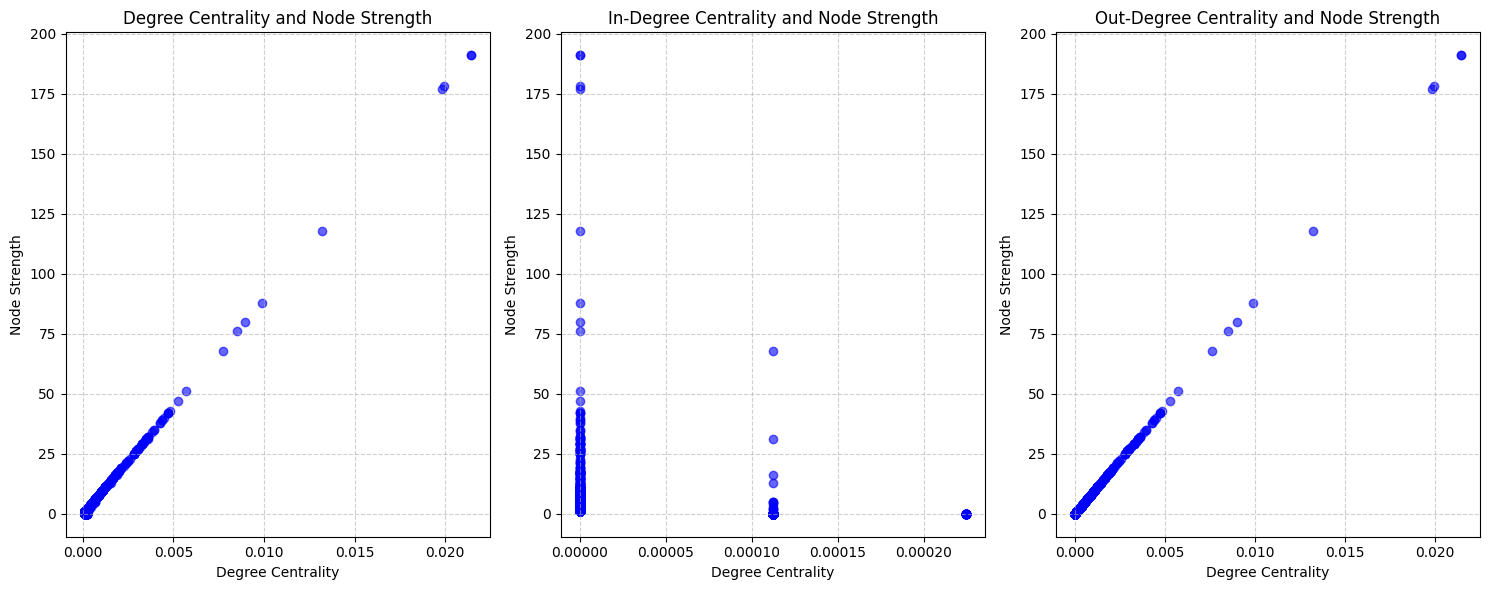

In [72]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from scipy.stats import pearsonr


degree_centrality = nx.degree_centrality(G)
in_degree_centrality = nx.in_degree_centrality(G)
out_degree_centrality = nx.out_degree_centrality(G)
node_strength = {node: len(list(G.neighbors(node))) for node in G.nodes()}

plt.figure(figsize=(15, 6))
plt.subplot(1,3,1)
plt.scatter(list(degree_centrality.values()), list(node_strength.values()), color='blue', alpha=0.6)
plt.title('Degree Centrality and Node Strength')
plt.xlabel('Degree Centrality')
plt.ylabel('Node Strength')
plt.grid(True, linestyle='--', alpha=0.6)

plt.subplot(1,3,2)
plt.scatter(list(in_degree_centrality.values()), list(node_strength.values()), color='blue', alpha=0.6)
plt.title('In-Degree Centrality and Node Strength')
plt.xlabel('Degree Centrality')
plt.ylabel('Node Strength')
plt.grid(True, linestyle='--', alpha=0.6)

plt.subplot(1,3,3)
plt.scatter(list(out_degree_centrality.values()), list(node_strength.values()), color='blue', alpha=0.6)
plt.title('Out-Degree Centrality and Node Strength')
plt.xlabel('Degree Centrality')
plt.ylabel('Node Strength')
plt.grid(True, linestyle='--', alpha=0.6)

correlation, _ = pearsonr(list(degree_centrality.values()), list(node_strength.values()))
correlation_in, _ = pearsonr(list(in_degree_centrality.values()), list(node_strength.values()))
correlation_out, _ = pearsonr(list(out_degree_centrality.values()), list(node_strength.values()))
print("Pearson correlation coefficient between Degree Centrality and Node Strength:", correlation)
print("Pearson correlation coefficient between In-Degree Centrality and Node Strength:", correlation_in)
print("Pearson correlation coefficient between Out-Degree Centrality and Node Strength:", correlation_out)

plt.tight_layout()
plt.show()

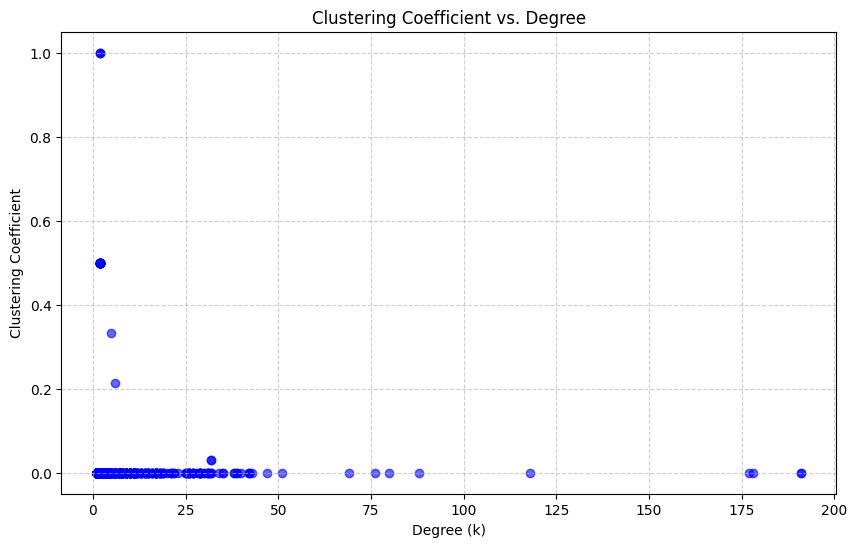

Average Clustering Coefficient: 0.002029602823624541


In [73]:
# Calculate degree and clustering coefficient for each node
degrees = dict(G.degree())
clustering_coefficients = nx.clustering(G)

# Create lists to store degree and corresponding clustering coefficient
degree_list = []
clustering_list = []

# Iterate over nodes and store degree and clustering coefficient
for node in G.nodes():
    degree = degrees[node]
    clustering_coefficient = clustering_coefficients[node]
    degree_list.append(degree)
    clustering_list.append(clustering_coefficient)

# Plot how the clustering coefficient varies with degree
plt.figure(figsize=(10, 6))
plt.scatter(degree_list, clustering_list, color='blue', alpha=0.6)
plt.title('Clustering Coefficient vs. Degree')
plt.xlabel('Degree (k)')
plt.ylabel('Clustering Coefficient')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

avg_clustering = nx.average_clustering(G)
print("Average Clustering Coefficient:", avg_clustering)